In [2]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

In [3]:
import torch

from torchvision import datasets, transforms as T
from torch.utils import data

In [4]:
mnist_transform = T.Compose([
    T.ToTensor(),
])

# train_dataset = datasets.FashionMNIST(root="../../_Datasets/", train=True, download=True, transform=mnist_transform)
# test_dataset = datasets.FashionMNIST(root="../../_Datasets/", train=False, download=True, transform=mnist_transform)
train_dataset = datasets.MNIST(root="../../_Datasets/", train=True, download=True, transform=mnist_transform)
test_dataset = datasets.MNIST(root="../../_Datasets/", train=False, download=True, transform=mnist_transform)

In [5]:
idx = torch.randperm(len(train_dataset))[:10000]
train_xx = train_dataset.data[idx].reshape(-1, 28*28).numpy().astype(float)/255.
train_yy = train_dataset.targets[idx].numpy()

In [6]:
idx = torch.randperm(len(test_dataset))[:5000]
test_xx = test_dataset.data[idx].reshape(-1, 28*28).numpy().astype(float)/255.
test_yy = test_dataset.targets[idx].numpy()

In [11]:
# train_xx

In [12]:
from sklearn.svm import SVC, LinearSVC

In [38]:
# svm = LinearSVC(dual=False, C=1.5)
# svm = LinearSVC(dual=False, C=c, penalty='l1')
# svm = SVC()
svm = SVC(kernel='linear', C=1.0, gamma=0.01)
svm.fit(train_xx, train_yy)

SVC(gamma=0.01, kernel='linear')

In [39]:
pred = svm.predict(test_xx)
#         a = accuracy_score(tslab_samp, pred)

In [40]:
(pred == test_yy).astype(float).mean()

0.9262

In [42]:
svm.support_vectors_.shape

(2758, 784)

In [50]:
svm.dual_coef_.shape

(9, 2758)

In [51]:
svm.n_support_.shape

(10,)

In [52]:
svm.support_.shape

(2758,)

In [59]:
np.sort(svm.dual_coef_[0], )

array([-0.61902553, -0.53023863, -0.45215468, ...,  0.05166078,
        0.0832315 ,  0.13608885])

In [73]:
# svm.dual_coef_

In [81]:
svm.n_support_

array([164, 151, 307, 318, 278, 345, 224, 251, 367, 353], dtype=int32)

In [90]:
support_idxs = np.insert(np.cumsum(svm.n_support_), 0, 0)
support_idxs

array([   0,  164,  315,  622,  940, 1218, 1563, 1787, 2038, 2405, 2758])

In [94]:
for i in range(len(svm.classes_)):
#     supi = svm.support_[support_idxs[i]:support_idxs[i+1]]
    sup = svm.support_vectors_[support_idxs[i]:support_idxs[i+1]]
    break

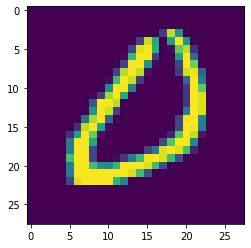

In [101]:
_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()

c = 
imgs = c[:len(axs)]

for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.set_axis_off()

plt.show()